In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [15]:
# remaining_features
data = pd.read_csv("mta.csv")
X = data.iloc[:, 0:19].values
y = data.iloc[:, 19].values
# y = data.iloc[:, 20].values
print(y)


['Cobalt Strike' 'Cobalt Strike' 'Cobalt Strike' ... 'dropper' 'dropper'
 'dropper']


In [16]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Applying PCA function on training and testing set of X component
pca = PCA() 

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

C:\Users\rivka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5678263645068624
Classification Report:
                precision    recall  f1-score   support

Cobalt Strike       0.48      0.43      0.46       651
      dropper       0.60      0.83      0.70      1677
  infostealer       0.45      0.14      0.21       805

     accuracy                           0.57      3133
    macro avg       0.51      0.47      0.45      3133
 weighted avg       0.54      0.57      0.52      3133



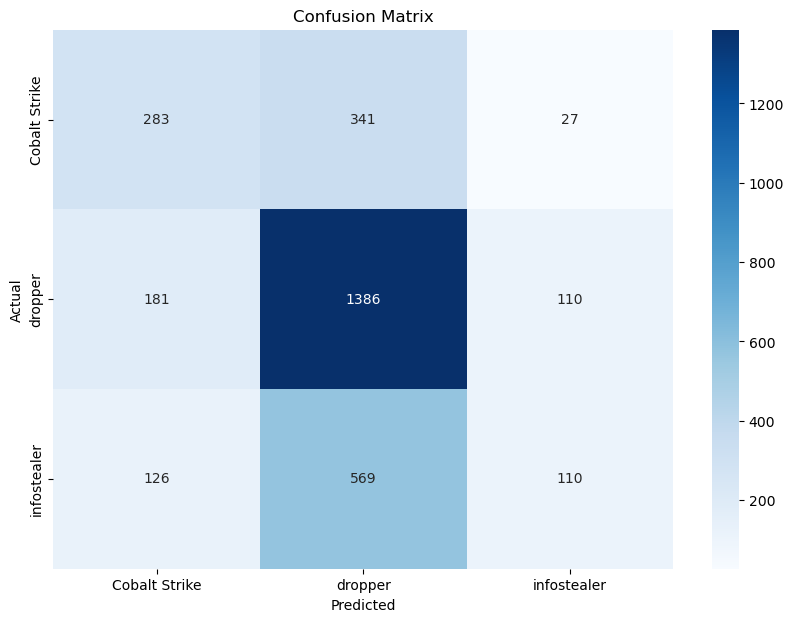

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fitting Logistic Regression to the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the test set result using predict function under LogisticRegression 
y_pred = classifier.predict(X_test)

# Calculating accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Plotting the confusion matrix
cf = pd.crosstab(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Random Forest Accuracy: 0.9109479731886371
Random Forest Classification Report:
                precision    recall  f1-score   support

Cobalt Strike       0.97      0.96      0.97       651
      dropper       0.93      0.92      0.92      1677
  infostealer       0.83      0.84      0.84       805

     accuracy                           0.91      3133
    macro avg       0.91      0.91      0.91      3133
 weighted avg       0.91      0.91      0.91      3133



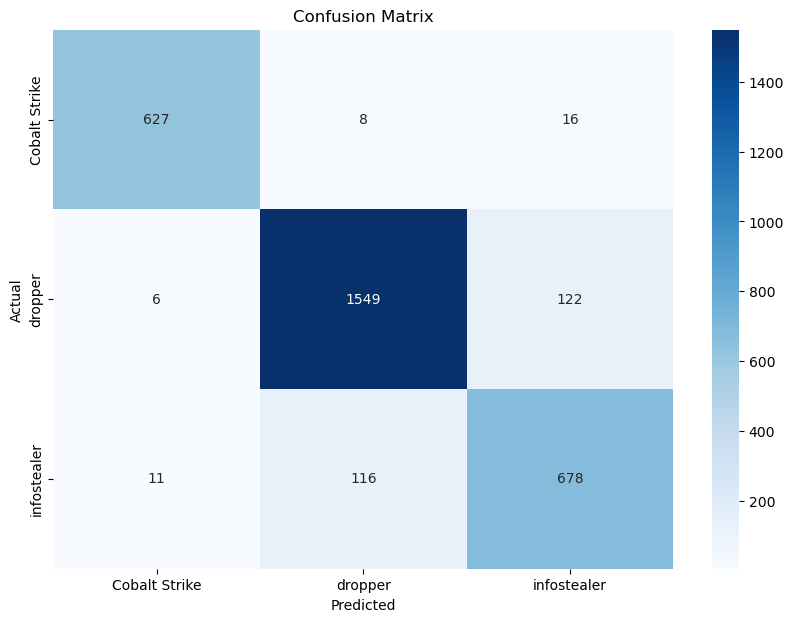

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# יצירת המודל
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# אימון המודל
rf_model.fit(X_train, y_train)

# Predicting the test set result using predict function under LogisticRegression 
# חיזוי והערכה
y_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
# Plotting the confusion matrix
cf = pd.crosstab(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


AdaBoost Accuracy: 0.7369932971592723
AdaBoost Classification Report:
                precision    recall  f1-score   support

Cobalt Strike       0.90      0.86      0.88       651
      dropper       0.75      0.83      0.79      1677
  infostealer       0.54      0.45      0.49       805

     accuracy                           0.74      3133
    macro avg       0.73      0.71      0.72      3133
 weighted avg       0.73      0.74      0.73      3133



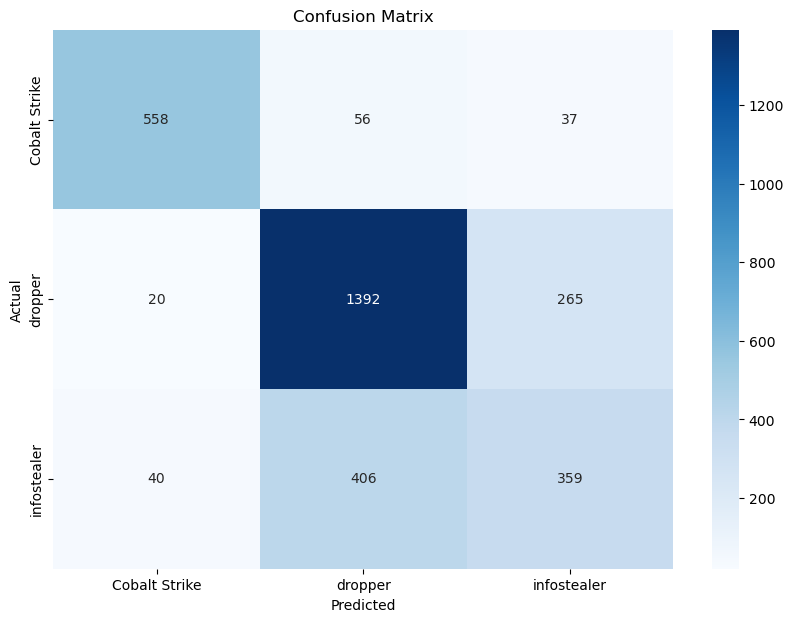

In [25]:
from sklearn.ensemble import AdaBoostClassifier

# יצירת המודל
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# אימון המודל
ada_model.fit(X_train, y_train)

# חיזוי והערכה
y_pred = ada_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred))
# Plotting the confusion matrix
cf = pd.crosstab(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


C:\Users\rivka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy: 0.8531758697733801
KNN Classification Report:
                precision    recall  f1-score   support

Cobalt Strike       0.91      0.93      0.92       651
      dropper       0.88      0.88      0.88      1677
  infostealer       0.75      0.73      0.74       805

     accuracy                           0.85      3133
    macro avg       0.85      0.85      0.85      3133
 weighted avg       0.85      0.85      0.85      3133



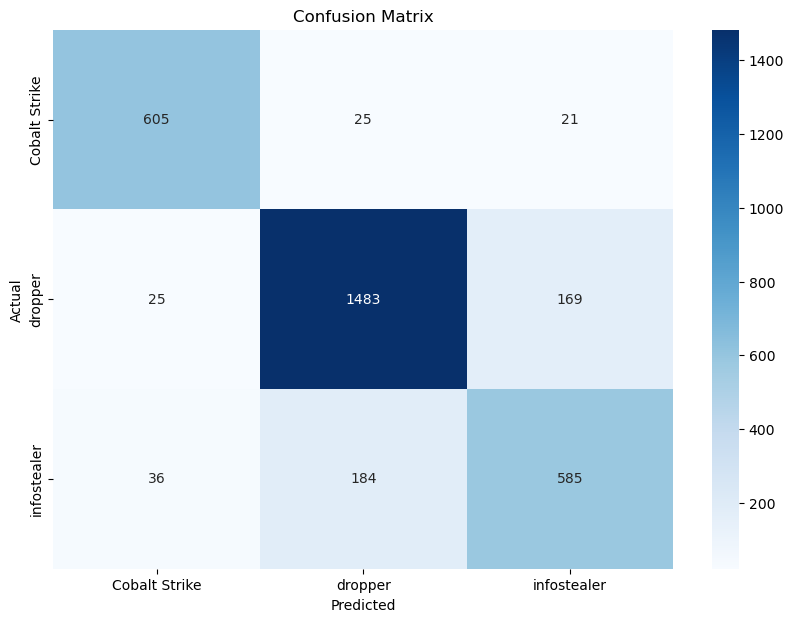

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# יצירת המודל
knn_model = KNeighborsClassifier(n_neighbors=5)

# אימון המודל
knn_model.fit(X_train, y_train)

# חיזוי והערכה
y_pred = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("KNN Classification Report:\n", classification_report(y_test, y_pred))
# Plotting the confusion matrix
cf = pd.crosstab(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


SVM Accuracy: 0.5505904883498245
SVM Classification Report:
                precision    recall  f1-score   support

Cobalt Strike       0.00      0.00      0.00       651
      dropper       0.55      0.99      0.70      1677
  infostealer       0.68      0.09      0.16       805

     accuracy                           0.55      3133
    macro avg       0.41      0.36      0.29      3133
 weighted avg       0.47      0.55      0.42      3133



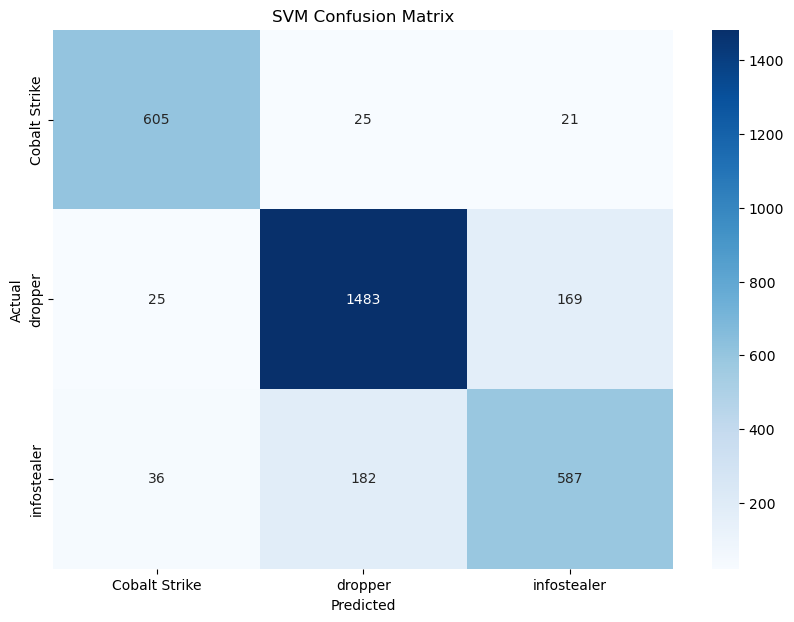

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# יצירת המודל עם פרמטרים שונים
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# אימון המודל
svm_model.fit(X_train, y_train)

# חיזוי והערכה
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Plotting the confusion matrix
cf = pd.crosstab(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM Confusion Matrix')
plt.show()
